<a href="https://colab.research.google.com/github/kenextra/IBM-MLCert/blob/main/Webservice_Deploy_Diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%bash
pip install diagrams --quiet

In [1]:
%%bash
pip show diagrams

Name: diagrams
Version: 0.20.0
Summary: Diagram as Code
Home-page: https://diagrams.mingrammer.com
Author: mingrammer
Author-email: mingrammer@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: graphviz, jinja2
Required-by: 


In [2]:
from diagrams import Cluster, Diagram, Edge
from diagrams.gcp.compute import AppEngine, Run
from diagrams.gcp.storage import GCS
from diagrams.gcp.devtools import GCR
from diagrams.gcp.ml import AIPlatform
from diagrams.generic.device import Mobile, Tablet

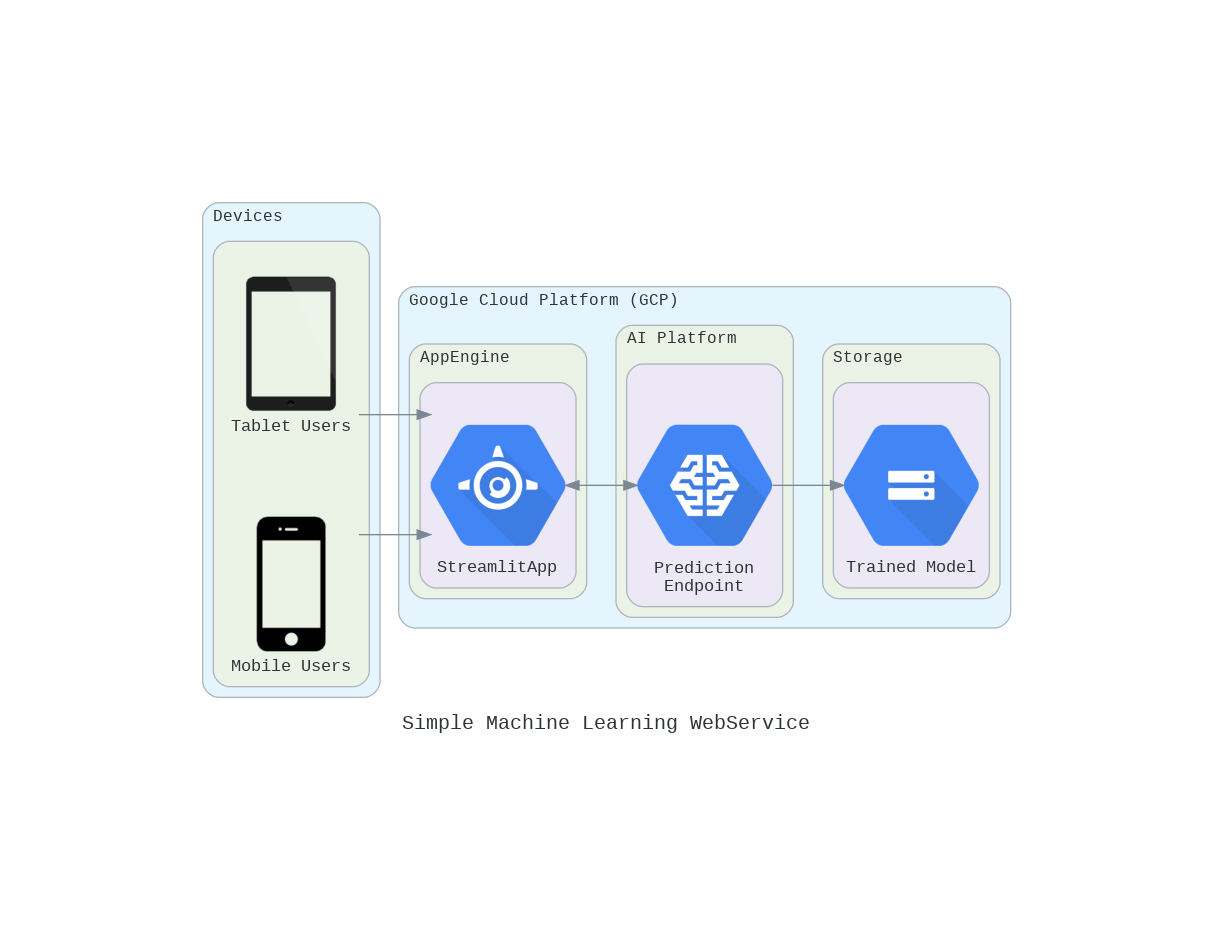

In [3]:
with Diagram("Simple Machine Learning WebService", show=False, filename='streamlit4') as med_diag:
    with Cluster("Google Cloud Platform (GCP)"):

        with Cluster("AppEngine",):
            with Cluster(""):
                appengine = AppEngine("StreamlitApp")

        with Cluster("AI Platform",):
            with Cluster(""):
                ml = AIPlatform("Prediction\nEndpoint")
                appengine >> Edge() << ml

        with Cluster("Storage",):
            with Cluster(""):
                storage = GCS("Trained Model")
                ml >> storage

    with Cluster("Devices"):
        with Cluster(""):
            tablet = Tablet("Tablet Users")
            mobile = Mobile("Mobile Users")
            tablet >> appengine
            mobile >> appengine
med_diag

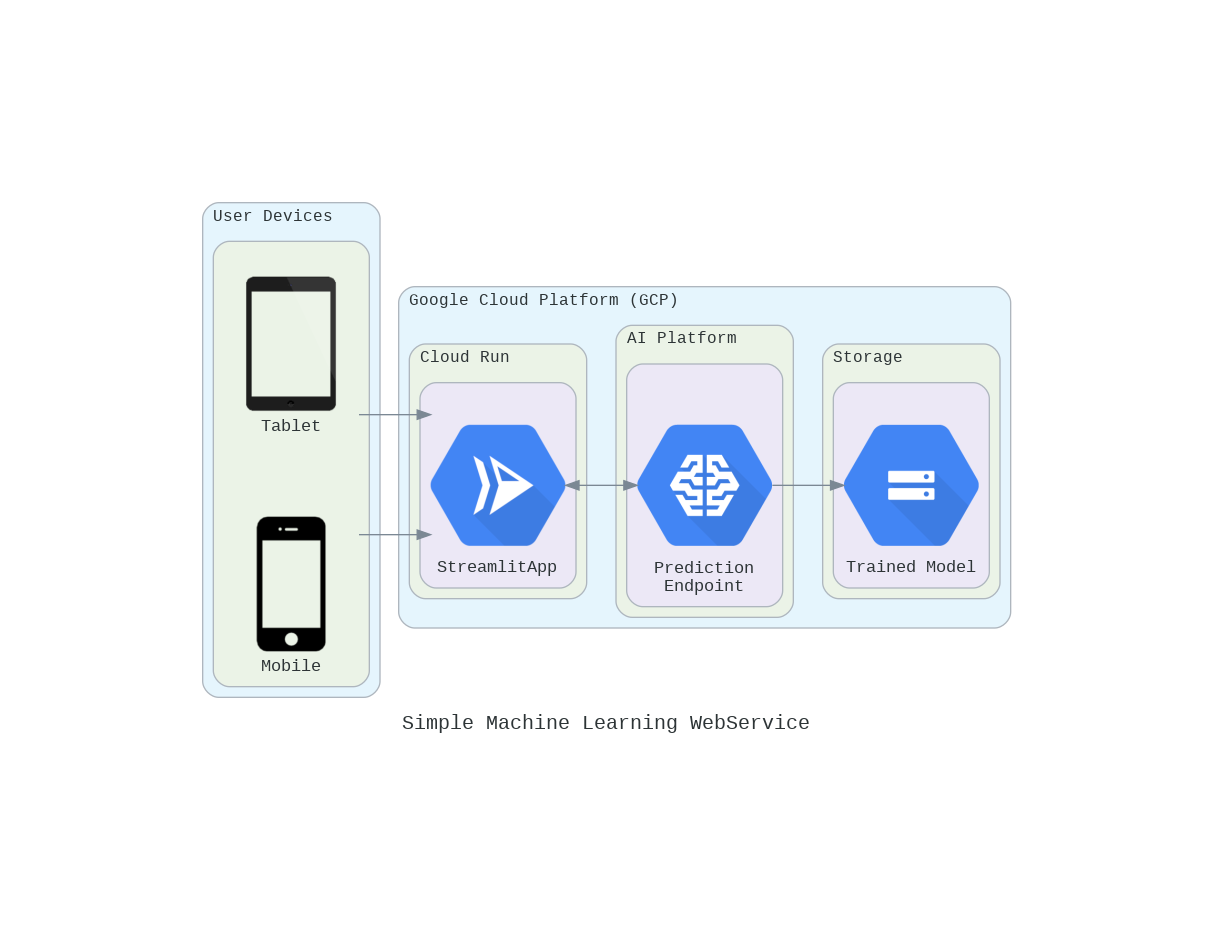

In [4]:
with Diagram("Simple Machine Learning WebService", show=False, filename='RunStreamlit') as med_diag:
    with Cluster("Google Cloud Platform (GCP)", ):

        with Cluster("Cloud Run",):
            with Cluster("", direction='BT'):
                run = Run("StreamlitApp")

        with Cluster("AI Platform",):
            with Cluster(""):
                ml = AIPlatform("Prediction\nEndpoint")
                run >> Edge() << ml

        with Cluster("Storage",):
            with Cluster(""):
                storage = GCS("Trained Model")
                ml >> storage

    with Cluster("User Devices"):
        with Cluster(""):
            tablet = Tablet("Tablet")
            mobile = Mobile("Mobile")
            tablet >> run
            mobile >> run
med_diag

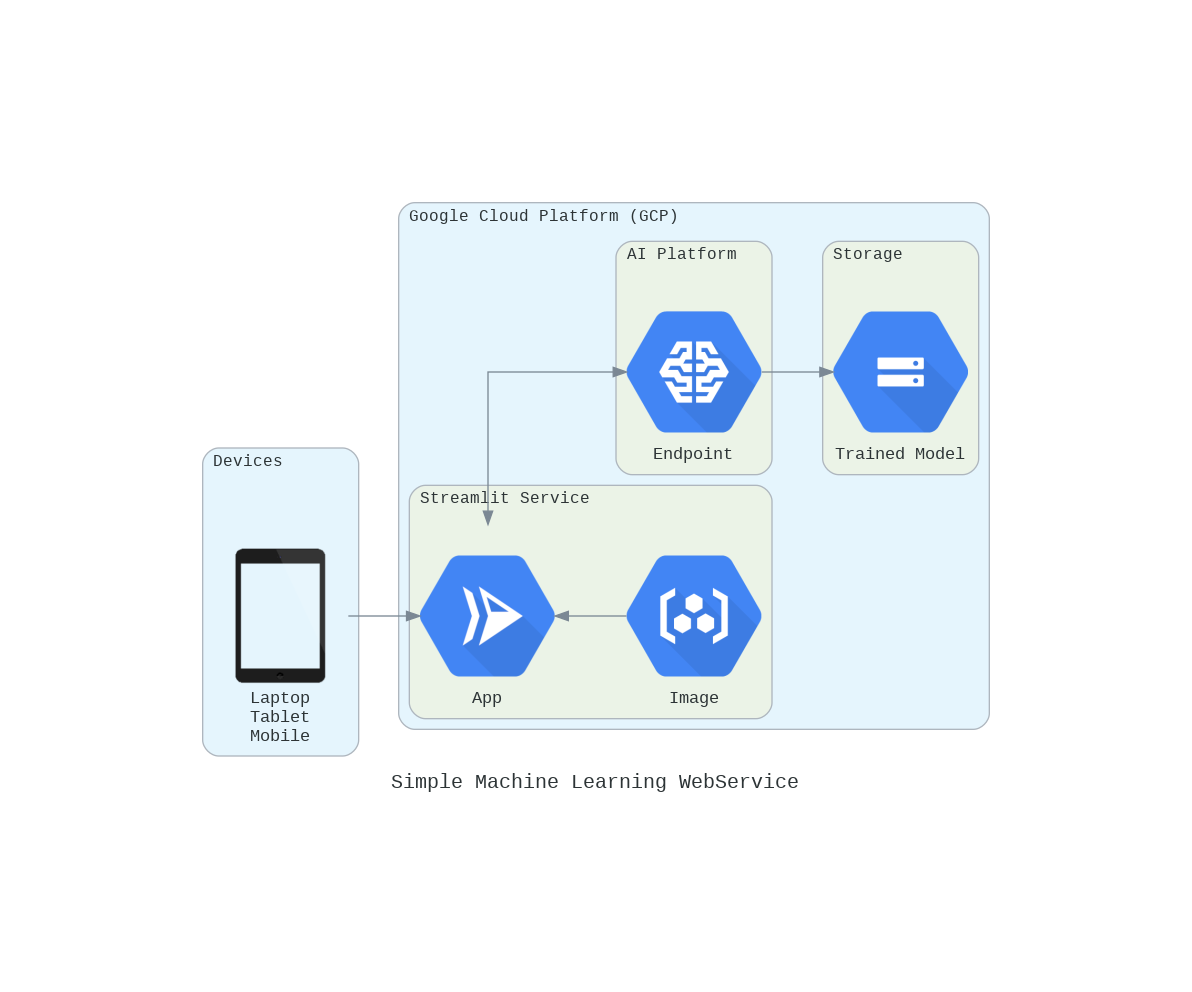

In [45]:
with Diagram("Simple Machine Learning WebService", show=False,
             filename='CloudRunStreamlit', direction='LR') as med_diag:
    with Cluster("Google Cloud Platform (GCP)", ):

        with Cluster("Streamlit Service", ):
            # with Cluster(""):
            image = GCR("Image")
            run = Run("App")
            # run >> Edge() << image
            run << image

        with Cluster("AI Platform", ):
            # with Cluster(""):
            ml = AIPlatform("Endpoint")
            run >> Edge() << ml

        with Cluster("Storage",):
            # with Cluster(""):
            storage = GCS("Trained Model")
            ml >> storage
    
    with Cluster("Devices", ):
        tablet = Tablet("Laptop\nTablet\nMobile")
        tablet >> run

med_diag